# 📈 Crypto Trader Behavior Analysis: A Study of Sentiment, Leverage, and Profitability

**Author:** Arush Gupta
<br>
**Date:** 2025-10-28


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Define file paths (assuming files are available in the runtime environment)
fear_greed_df = pd.read_csv('csv_files\\fear_greed_index.csv')
trader_data_df = pd.read_csv('csv_files\\historical_data.csv')

display(fear_greed_df.head())
display(trader_data_df.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,02-12-2024 22:50,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,02-12-2024 22:50,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,02-12-2024 22:50,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,02-12-2024 22:50,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,02-12-2024 22:50,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00


In [3]:
trader_data_df['Timestamp IST'] = pd.to_datetime(trader_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_data_df['date'] = trader_data_df['Timestamp IST'].dt.strftime('%Y-%m-%d')

merged_data = pd.merge(trader_data_df, fear_greed_df[['date', 'classification']], 
                      on='date', 
                      how='left')

print("Data shape before merge:", trader_data_df.shape)
print("Data shape after merge:", merged_data.shape)
print("\nSample of merged data:")
display(merged_data.head())

# Save merged dataset to outputs folder
merged_data.to_csv('outputs/merged_data.csv', index=False)
print("Saved merged_data to outputs/merged_data.csv")

Data shape before merge: (211224, 17)
Data shape after merge: (211224, 18)

Sample of merged data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,2024-12-02 22:50:00,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,2024-12-02 22:50:00,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,2024-12-02 22:50:00,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00,2024-12-02,Extreme Greed


Saved merged_data to outputs/merged_data.csv


In [4]:
nan_in_classification = merged_data['classification'].isnull().sum()
total_rows = len(merged_data)
print(f"Total rows in merged data: {total_rows}")
print(f"Rows with missing sentiment data (NaNs): {nan_in_classification}")
print(f"Percentage of rows missing sentiment: {nan_in_classification / total_rows * 100:.2f}%")

merged_data_cleaned = merged_data.dropna(subset=['classification', 'Closed PnL']).copy()

merged_data_cleaned['classification'] = merged_data_cleaned['classification'].astype(str)
merged_data_cleaned['Closed PnL'] = pd.to_numeric(merged_data_cleaned['Closed PnL'], errors='coerce')
merged_data_cleaned.dropna(subset=['Closed PnL'], inplace=True)

print(f"\nTotal rows after cleaning NaNs: {len(merged_data_cleaned)}")

Total rows in merged data: 211224
Rows with missing sentiment data (NaNs): 6
Percentage of rows missing sentiment: 0.00%

Total rows after cleaning NaNs: 211218


In [6]:
merged_data_cleaned['profit_loss'] = merged_data_cleaned['Closed PnL']
merged_data_cleaned['inferred_leverage'] = merged_data_cleaned['Size USD'] / (merged_data_cleaned['Size Tokens'] + 1e-6)

leverage_quantiles = merged_data_cleaned['inferred_leverage'].quantile([0.33, 0.66])
merged_data_cleaned['leverage_group'] = pd.cut(merged_data_cleaned['inferred_leverage'],
                                               bins=[-np.inf, leverage_quantiles.iloc[0], leverage_quantiles.iloc[1], np.inf],
                                               labels=['Low Leverage', 'Medium Leverage', 'High Leverage'],
                                               include_lowest=True)

print("Feature engineering complete.")
display(merged_data_cleaned[['profit_loss', 'inferred_leverage', 'leverage_group']].head())
merged_data_cleaned.to_csv('outputs//merged_data_cleaned.csv', index=False)


Feature engineering complete.


,profit_loss,inferred_leverage,leverage_group
0,0.00,7.98,Low Leverage
1,0.00,7.98,Low Leverage
2,0.00,7.99,Low Leverage
3,0.00,7.99,Low Leverage
4,0.00,7.99,Low Leverage


In [7]:
sentiment_profitability = merged_data_cleaned.groupby('classification')['profit_loss'].agg(['mean', 'count']).reset_index()
sentiment_profitability.rename(columns={'mean': 'average_profit_loss', 'count': 'number_of_trades'}, inplace=True)

wins = merged_data_cleaned[merged_data_cleaned['profit_loss'] > 0].groupby('classification').size().reset_index(name='number_of_wins')
sentiment_profitability = pd.merge(sentiment_profitability, wins, on='classification', how='left').fillna(0)
sentiment_profitability['win_rate'] = (sentiment_profitability['number_of_wins'] / sentiment_profitability['number_of_trades']) * 100

print("Profitability by Market Sentiment:")
display(sentiment_profitability.sort_values(by='average_profit_loss', ascending=False))

sentiment_profitability.to_csv('outputs//sentiment_profitability.csv', index=False)


Profitability by Market Sentiment:


,classification,average_profit_loss,number_of_trades,number_of_wins,win_rate
1,Extreme Greed,67.89,39992,18594,46.49
2,Fear,54.29,61837,26019,42.08
3,Greed,42.74,50303,19358,38.48
0,Extreme Fear,34.54,21400,7931,37.06
4,Neutral,34.31,37686,14961,39.70


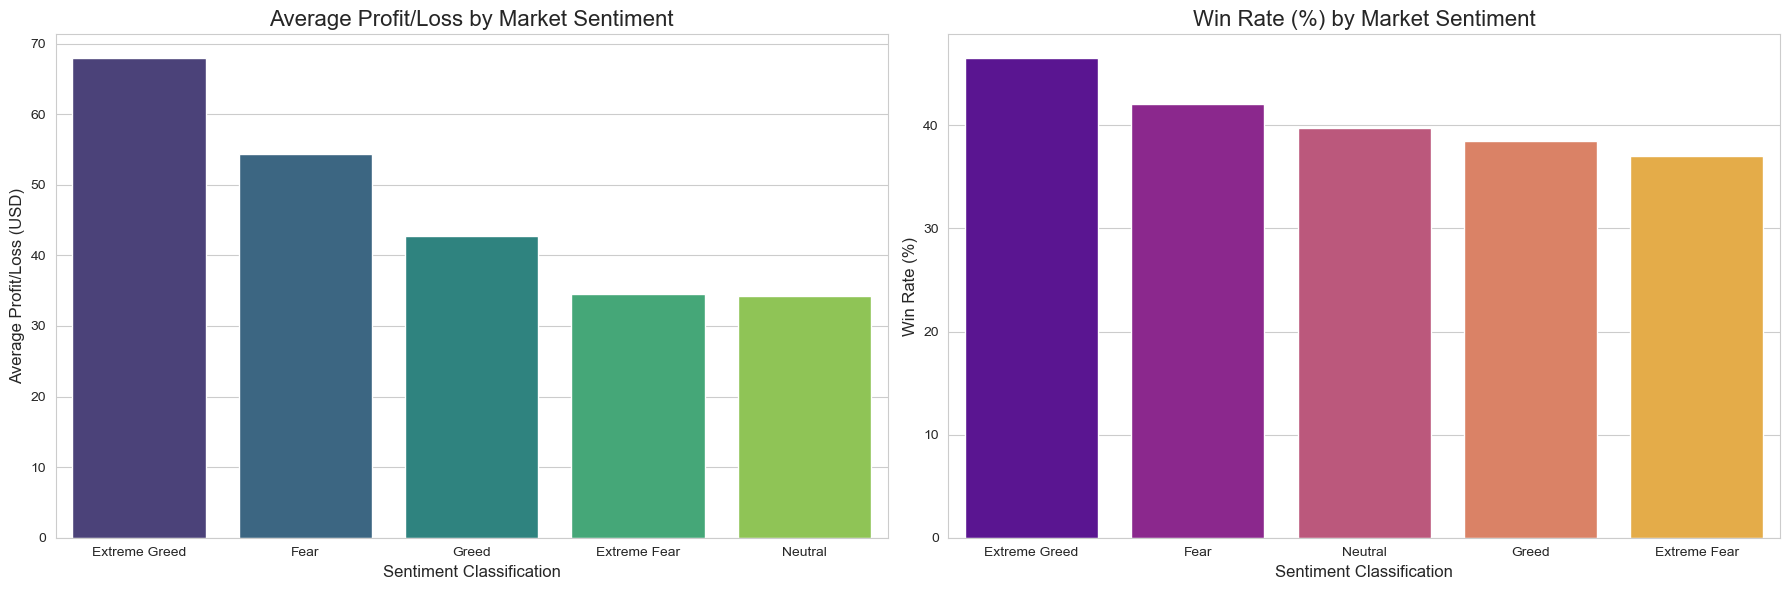

In [8]:
# Visualize the findings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Sort for aesthetic plots
sentiment_profitability.sort_values('average_profit_loss', ascending=False, inplace=True)

# Bar plot for Average Profit/Loss
sns.barplot(data=sentiment_profitability, x='classification', y='average_profit_loss',
            order=sentiment_profitability['classification'], ax=ax1, palette='viridis')
ax1.set_title('Average Profit/Loss by Market Sentiment', fontsize=16)
ax1.set_xlabel('Sentiment Classification', fontsize=12)
ax1.set_ylabel('Average Profit/Loss (USD)', fontsize=12)

# Bar plot for Win Rate
sentiment_profitability.sort_values('win_rate', ascending=False, inplace=True)
sns.barplot(data=sentiment_profitability, x='classification', y='win_rate',
            order=sentiment_profitability['classification'], ax=ax2, palette='plasma')
ax2.set_title('Win Rate (%) by Market Sentiment', fontsize=16)
ax2.set_xlabel('Sentiment Classification', fontsize=12)
ax2.set_ylabel('Win Rate (%)', fontsize=12)
fig.savefig('outputs/sentiment_profitability_combined.png', dpi=300)

plt.tight_layout()
plt.show()

In [9]:
leverage_profitability = merged_data_cleaned.groupby('leverage_group', observed=False)['profit_loss'].agg(['mean', 'count']).reset_index()
leverage_profitability.rename(columns={'mean': 'average_profit_loss', 'count': 'number_of_trades'}, inplace=True)

leverage_wins = merged_data_cleaned[merged_data_cleaned['profit_loss'] > 0].groupby('leverage_group', observed=False).size().reset_index(name='number_of_wins')
leverage_profitability = pd.merge(leverage_profitability, leverage_wins, on='leverage_group', how='left')
leverage_profitability['number_of_wins'] = leverage_profitability['number_of_wins'].fillna(0)
leverage_profitability['win_rate'] = (leverage_profitability['number_of_wins'] / leverage_profitability['number_of_trades']) * 100

print("Profitability by Inferred Leverage Group:")
display(leverage_profitability.sort_values(by='average_profit_loss', ascending=False))

leverage_profitability.to_csv('outputs//leverage_profitability.csv', index=False)

Profitability by Inferred Leverage Group:


,leverage_group,average_profit_loss,number_of_trades,number_of_wins,win_rate
2,High Leverage,67.81,71813,27691,38.56
1,Medium Leverage,44.81,69703,30229,43.37
0,Low Leverage,32.45,69702,28943,41.52


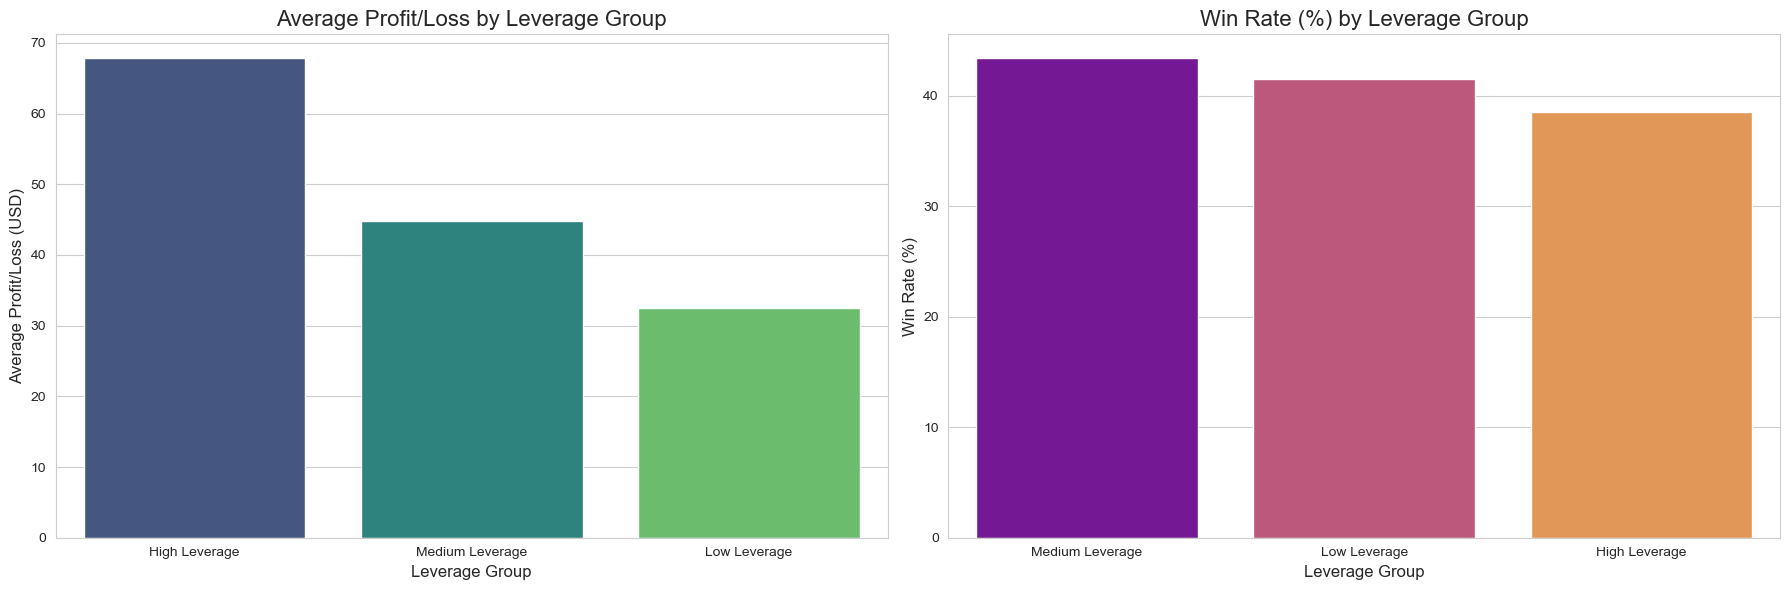

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

leverage_profitability.sort_values('average_profit_loss', ascending=False, inplace=True)

sns.barplot(data=leverage_profitability, x='leverage_group', y='average_profit_loss',
            order=leverage_profitability['leverage_group'], ax=ax1, palette='viridis')
ax1.set_title('Average Profit/Loss by Leverage Group', fontsize=16)
ax1.set_xlabel('Leverage Group', fontsize=12)
ax1.set_ylabel('Average Profit/Loss (USD)', fontsize=12)

leverage_profitability.sort_values('win_rate', ascending=False, inplace=True)
sns.barplot(data=leverage_profitability, x='leverage_group', y='win_rate',
            order=leverage_profitability['leverage_group'], ax=ax2, palette='plasma')
ax2.set_title('Win Rate (%) by Leverage Group', fontsize=16)
ax2.set_xlabel('Leverage Group', fontsize=12)
ax2.set_ylabel('Win Rate (%)', fontsize=12)
fig.savefig('outputs/leverage_profitability.png', dpi=300)
plt.tight_layout()
plt.show()

In [11]:
trader_profiles = merged_data_cleaned.groupby('Account').agg(
    total_trades=('Trade ID', 'count'),
    total_profit_loss=('profit_loss', 'sum'),
    average_profit_loss=('profit_loss', 'mean'),
    win_rate=('profit_loss', lambda x: (x > 0).sum() / len(x) * 100)
).reset_index()

trader_profiles.fillna(0, inplace=True)

trader_profiles.to_csv('outputs/trader_profiles.csv', index=False)

print("Trader Profiles:")
display(trader_profiles.head())

trader_profiles.fillna(0, inplace=True)

Trader Profiles:


,Account,total_trades,total_profit_loss,average_profit_loss,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,1600229.82,419.13,35.96
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,47885.32,6.58,44.27
2,0x271b280974205ca63b716753467d5a371de622ab,3809,-70436.19,-18.49,30.19
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,132464.81,9.95,43.86
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,168658.00,52.07,51.99


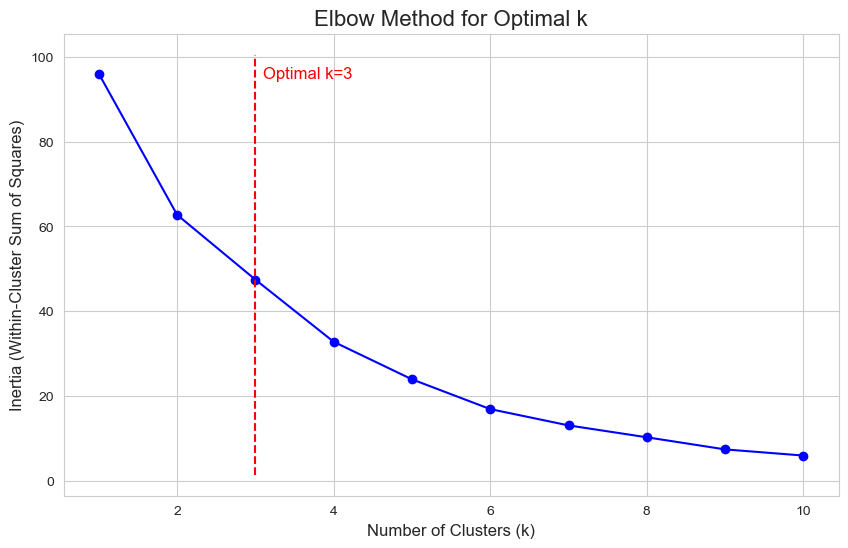

<Figure size 1200x600 with 0 Axes>

In [12]:
features_for_clustering = ['total_profit_loss', 'average_profit_loss', 'win_rate']
X = trader_profiles[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.vlines(3, ymin=plt.ylim()[0], ymax=plt.ylim()[1], colors='r', linestyles='--')
plt.text(3.1, plt.ylim()[1]*0.9, 'Optimal k=3', color='r', fontsize=12)
plt.show()

plt.savefig('outputs/elbow_method.png', dpi=300, bbox_inches='tight')


In [13]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
trader_profiles['cluster'] = kmeans.fit_predict(X_scaled)

print("Trader profiles with cluster labels:")
display(trader_profiles.head())

cluster_summary = trader_profiles.groupby('cluster')[features_for_clustering].mean()
print("\nCluster Summary (Averages):")
display(cluster_summary)

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, 
                             columns=features_for_clustering)
cluster_centers['cluster'] = range(len(cluster_centers))
cluster_centers.to_csv('outputs/cluster_centers.csv', index=False)

cluster_summary = trader_profiles.groupby('cluster').agg({
    'total_trades': ['count', 'mean'],
    'total_profit_loss': ['mean', 'sum'],
    'average_profit_loss': ['mean', 'std'],
    'win_rate': ['mean', 'std']
}).round(2)

cluster_summary.columns = [f'{x[0]}_{x[1]}' for x in cluster_summary.columns]
cluster_summary.reset_index(inplace=True)

cluster_summary.to_csv('outputs/cluster_summary.csv', index=False)

print("Results saved to outputs/cluster_centers.csv and outputs/cluster_summary.csv")

Trader profiles with cluster labels:


,Account,total_trades,total_profit_loss,average_profit_loss,win_rate,cluster
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,1600229.82,419.13,35.96,1
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,47885.32,6.58,44.27,0
2,0x271b280974205ca63b716753467d5a371de622ab,3809,-70436.19,-18.49,30.19,2
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,132464.81,9.95,43.86,0
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,168658.00,52.07,51.99,0



Cluster Summary (Averages):


,total_profit_loss,average_profit_loss,win_rate
cluster,,,
0,288774.83,62.68,48.20
1,858259.16,324.25,34.42
2,70300.87,19.25,32.72


Results saved to outputs/cluster_centers.csv and outputs/cluster_summary.csv


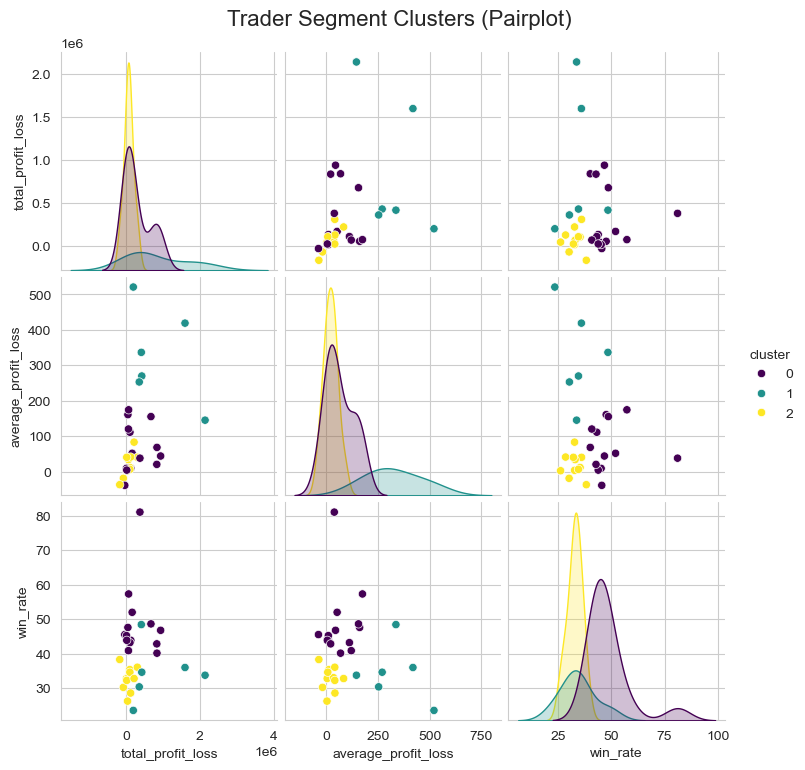

Saved pairplot to: outputs/trader_segment_pairplot.png


In [14]:

g = sns.pairplot(trader_profiles, vars=features_for_clustering, hue='cluster', palette='viridis', diag_kind='kde')
g.fig.suptitle('Trader Segment Clusters (Pairplot)', y=1.02, fontsize=16)
plt.show()
g.fig.savefig('outputs/trader_segment_pairplot.png', dpi=300, bbox_inches='tight')
print("Saved pairplot to: outputs/trader_segment_pairplot.png")

In [15]:
from pathlib import Path

print("--- 1. ANOVA for Profit/Loss by Sentiment Classification ---")
sentiment_anova = ols('profit_loss ~ C(classification)', data=merged_data_cleaned).fit()
sentiment_anova_table = sm.stats.anova_lm(sentiment_anova, typ=2)
print(sentiment_anova_table)

if sentiment_anova_table['PR(>F)'][0] < 0.05:
    print("\nResult: Significant (p < 0.05). Running Tukey HSD test...")
    merged_data_cleaned['classification'] = merged_data_cleaned['classification'].astype(str)
    tukey_sentiment = pairwise_tukeyhsd(endog=merged_data_cleaned['profit_loss'],
                                        groups=merged_data_cleaned['classification'],
                                        alpha=0.05)
    print(tukey_sentiment)
else:
    print("\nResult: Not Significant (p >= 0.05).")

print("\n\n--- 2. ANOVA for Profit/Loss by Leverage Group ---")
leverage_anova = ols('profit_loss ~ C(leverage_group)', data=merged_data_cleaned).fit()
leverage_anova_table = sm.stats.anova_lm(leverage_anova, typ=2)
print(leverage_anova_table)

if leverage_anova_table['PR(>F)'][0] < 0.05:
    print("\nResult: Significant (p < 0.05). Running Tukey HSD test...")
    tukey_leverage = pairwise_tukeyhsd(endog=merged_data_cleaned['profit_loss'],
                                       groups=merged_data_cleaned['leverage_group'],
                                       alpha=0.05)
    print(tukey_leverage)
else:
    print("\nResult: Not Significant (p >= 0.05).")


print("\n\n--- 3. ANOVA for Average Profit/Loss by Trader Cluster ---")

cluster_anova = ols('average_profit_loss ~ C(cluster)', data=trader_profiles).fit()
cluster_anova_table = sm.stats.anova_lm(cluster_anova, typ=2)
print(cluster_anova_table)

if cluster_anova_table['PR(>F)'][0] < 0.05:
    print("\nResult: Significant (p < 0.05). Running Tukey HSD test...")
    tukey_cluster = pairwise_tukeyhsd(endog=trader_profiles['average_profit_loss'],
                                      groups=trader_profiles['cluster'],
                                      alpha=0.05)
    print(tukey_cluster)
else:
    print("\nResult: Not Significant (p >= 0.05).")

sentiment_anova_table.to_csv('outputs/sentiment_anova_table.csv')
leverage_anova_table.to_csv('outputs/leverage_anova_table.csv')
cluster_anova_table.to_csv('outputs/cluster_anova_table.csv')

def tukey_to_df(tukey_obj):
    try:
        data = tukey_obj.summary().data
        return pd.DataFrame(data[1:], columns=data[0])
    except Exception:
        try:
            table = tukey_obj._results_table.data
            return pd.DataFrame(table[1:], columns=table[0])
        except Exception:
            return None

    for name in ['tukey_sentiment', 'tukey_leverage', 'tukey_cluster']:
        if name in globals():
            df_res = tukey_to_df(globals()[name])
            if df_res is not None:
                out_path = f'outputs/{name}_results.csv'
                df_res.to_csv(out_path, index=False)
                print(f"Saved: {out_path}")
            else:
                print(f"Could not convert {name} to DataFrame.")

--- 1. ANOVA for Profit/Loss by Sentiment Classification ---
                           sum_sq        df    F  PR(>F)
C(classification)     30542477.56      4.00 9.06    0.00
Residual          177963133630.02 211213.00  NaN     NaN

Result: Significant (p < 0.05). Running Tukey HSD test...
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
 Extreme Fear Extreme Greed   33.355 0.0002  12.1482  54.5618   True
 Extreme Fear          Fear  19.7525  0.052  -0.1057  39.6108  False
 Extreme Fear         Greed   8.2057 0.8091 -12.2295  28.6409  False
 Extreme Fear       Neutral  -0.2301    1.0 -21.6619  21.2017  False
Extreme Greed          Fear -13.6025 0.1418 -29.6696   2.4647  False
Extreme Greed         Greed -25.1493 0.0004 -41.9243  -8.3743   True
Extreme Greed       Neutral -33.5851    0.0 -51.5608 -15.6095   True
         Fear      